In [138]:
import matplotlib.pyplot as plt
import numpy as np
import sympy
from tqdm import tqdm

sympy.init_printing()

In [139]:
A, B, C, D, E, F, G, H = sympy.symbols("A B C D E F G H")

In [140]:
theta, tau = sympy.symbols("theta tau")

In [141]:
r_tilde = sympy.symbols("\\tilde{r}", real=True)

In [142]:
delta_r, delta_theta, W, xi = sympy.symbols("Delta_r Delta_theta W Xi")

In [143]:
dt, dr_tilde, dtheta, dphi, dphi_tilde, dtau = sympy.symbols(r"dt d\tilde{r} d\theta d\phi d\tilde{\phi} d\tau")

In [144]:
a, r_tilde_plus = sympy.symbols("a \\tilde{r}_+")

### Metric

In [145]:
metric_orig = -delta_r / W * (dt - a * sympy.sin(theta) ** 2 * dphi / xi) ** 2
metric_orig += delta_theta * sympy.sin(theta) ** 2 / W * (a * dt - (r_tilde ** 2 + a ** 2) * dphi / xi) ** 2
metric_orig += W * dr_tilde ** 2 / delta_r
metric_orig

In [146]:
dt_val = sympy.I * dtau

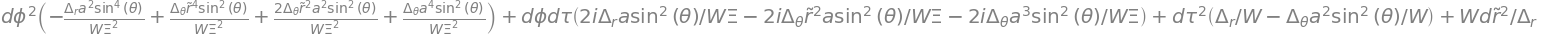

In [147]:
euclidean_metric = metric_orig.subs({dt: dt_val}).expand().collect([dtau ** 2, dtau * dphi, dphi ** 2])
euclidean_metric

In [148]:
omega = sympy.symbols("Omega")
dphi_val = dphi_tilde + omega * dt_val
dphi_val

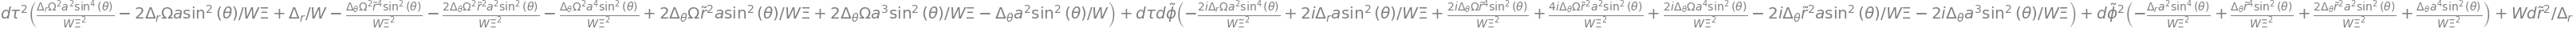

In [149]:
euclidean_metric_2 = euclidean_metric.subs({dphi: dphi_val}).expand().collect([dtau ** 2, dtau * dphi_tilde, dphi_tilde ** 2])
euclidean_metric_2

In [150]:
metric_list_matrix = [[0 for i in range(3)] for i in range(3)]

# tau
metric_list_matrix[0][0] = euclidean_metric_2.coeff(dtau ** 2)
metric_list_matrix[0][1] = euclidean_metric_2.coeff(dtau * dr_tilde) / 2
metric_list_matrix[0][2] = euclidean_metric_2.coeff(dtau * dphi_tilde) / 2

# r_tilde
metric_list_matrix[1][0] = euclidean_metric_2.coeff(dr_tilde * dtau) / 2
metric_list_matrix[1][1] = euclidean_metric_2.coeff(dr_tilde ** 2)
metric_list_matrix[1][2] = euclidean_metric_2.coeff(dr_tilde * dphi_tilde) / 2

# phi_tilde
metric_list_matrix[2][0] = euclidean_metric_2.coeff(dphi_tilde * dtau) / 2
metric_list_matrix[2][1] = euclidean_metric_2.coeff(dphi_tilde * dr_tilde) / 2
metric_list_matrix[2][2] = euclidean_metric_2.coeff(dphi_tilde ** 2)

In [151]:
g_mat = sympy.Matrix(metric_list_matrix)
g_mat.simplify()
g_mat

⎡ 2 ⎛    2    2                      4                     2  2           4⎞  
⎢Ω ⋅⎝Δᵣ⋅a ⋅sin (θ) - Δₜₕₑₜₐ⋅\tilde{r}  - 2⋅Δₜₕₑₜₐ⋅\tilde{r} ⋅a  - Δₜₕₑₜₐ⋅a ⎠⋅s
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                     ⎛  ⎛      2    2                      4                 
⎢                   ⅈ⋅⎝Ω⋅⎝- Δᵣ⋅a ⋅sin (θ) + Δₜₕₑₜₐ⋅\tilde{r}  + 2⋅Δₜₕₑₜₐ⋅\tild
⎢                   ────────────────────────────────

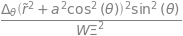

In [152]:
g_mat.det().simplify()

#### $\Delta_r$

In [309]:
z_r, z_i = sympy.symbols("z_r z_i")
delta_r_val = z_r + sympy.I * z_i
delta_r_val

In [310]:
real_delta_r = r_tilde ** 4 - r_tilde_plus ** 4 + (r_tilde_plus - r_tilde) ** 2 * (a + 1) ** 2 + 2 * a * (r_tilde_plus ** 2 - r_tilde ** 2)
real_delta_r

In [311]:
imag_delta_r = 2 * (r_tilde_plus - r_tilde) * (a + 1) * (r_tilde_plus ** 2 - a)
imag_delta_r

In [312]:
delta_theta_val = 1 - a ** 2 * sympy.cos(theta) ** 2
xi_val = 1 - a ** 2
W_val = r_tilde ** 2 + a ** 2 * sympy.cos(theta) ** 2
omega_val = a * xi / (r_tilde_plus ** 2 + a ** 2)

In [313]:
g_mat_subs = g_mat.subs({delta_r: delta_r_val})
g_mat_subs

⎡ 2 ⎛                  4                     2  2           4    2            
⎢Ω ⋅⎝- Δₜₕₑₜₐ⋅\tilde{r}  - 2⋅Δₜₕₑₜₐ⋅\tilde{r} ⋅a  - Δₜₕₑₜₐ⋅a  + a ⋅(ⅈ⋅zᵢ + zᵣ)
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                          ⎛  ⎛                4                     2  2     
⎢                        ⅈ⋅⎝Ω⋅⎝Δₜₕₑₜₐ⋅\tilde{r}  + 2⋅Δₜₕₑₜₐ⋅\tilde{r} ⋅a  + Δₜ
⎢                        ───────────────────────────

#### A and B coefficients

In [314]:
g_00 = sympy.fraction(g_mat_subs[0, 0])[0].expand().collect(sympy.I)
# g_00 = g_mat_subs[0, 0].expand().collect(sympy.I)
g_00

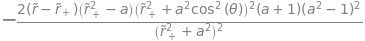

In [315]:
B_val = g_00.coeff(sympy.I).subs({z_i: imag_delta_r, omega: omega_val, xi: xi_val}).simplify()
# B_val = g_00.coeff(sympy.I).subs({z_i: imag_delta_r, omega: omega_val, xi: xi_val, W: W_val}).simplify()
B_val

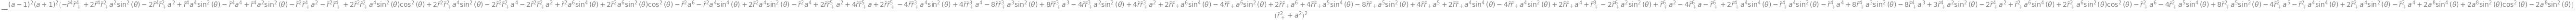

In [316]:
A_val = sum(g_00.args[1:]).subs({z_r: real_delta_r, omega: omega_val}).subs({delta_theta: delta_theta_val, xi: xi_val, W: W_val}).expand().simplify().factor()
A_val

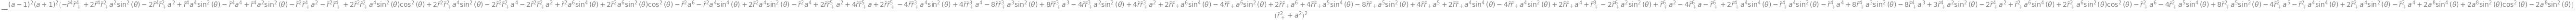

In [317]:
A_val_2 = delta_r * (xi - a * omega * sympy.sin(theta) ** 2) ** 2 - delta_theta * sympy.sin(theta) ** 2 * (a * xi - omega * (r_tilde ** 2 + a ** 2)) ** 2
A_val_2 = A_val_2.subs({delta_r: real_delta_r}).simplify()
# A_val_2 = (A_val_2 / (W * xi ** 2)).subs({delta_r: real_delta_r}).simplify()
A_val_2 = A_val_2.subs({omega: omega_val}).subs({delta_theta: delta_theta_val, xi: xi_val, W: W_val}).expand().simplify().factor()
A_val_2

In [318]:
(A_val - A_val_2).simplify()

#### C and D coefficients

In [319]:
# g_02 = g_mat_subs[0, 2].expand().collect(sympy.I)
g_02 = sympy.fraction(g_mat_subs[0, 2])[0].expand().collect(sympy.I)
g_02

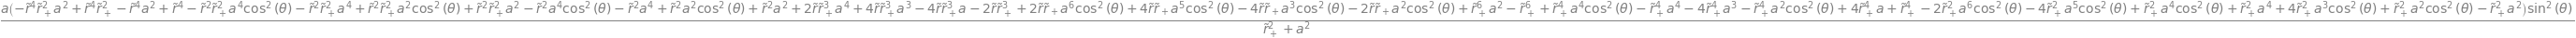

In [320]:
D_val = g_02.coeff(sympy.I).subs({z_r: real_delta_r}).simplify()
D_val = D_val.subs({W: W_val, xi: xi_val, omega: omega_val, delta_theta: delta_theta_val}).expand().simplify()
D_val

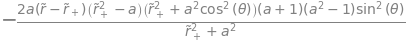

In [321]:
C_val = sum(g_02.args[1:]).subs({omega: omega_val}).subs({z_i: imag_delta_r, W: W_val, xi: xi_val}).simplify()
C_val

#### E and F coefficients

In [322]:
# g_22 = g_mat_subs[2, 2].expand().collect(sympy.I)
g_22 = sympy.fraction(g_mat_subs[2, 2])[0].expand().collect(sympy.I)
g_22

In [323]:
F_val = g_22.coeff(sympy.I).subs({z_i: imag_delta_r, W: W_val, xi: xi_val}).simplify()
F_val

In [324]:
E_val = g_22 - g_22.coeff(sympy.I) * sympy.I
E_val = E_val.subs({z_r: real_delta_r, W: W_val, xi: xi_val, delta_theta: delta_theta_val}).expand().simplify()
E_val

#### G and H coefficients

In [325]:
g_11_num, g_11_denom = sympy.fraction(g_mat_subs[1, 1])
g_11_num, g_11_denom

In [326]:
g_11_num = (g_11_num * (z_r - sympy.I * z_i)).subs({W: W_val}).subs({z_i: imag_delta_r, z_r: real_delta_r}).expand().collect(sympy.I)
g_11_num

In [327]:
g_11_denom = (g_11_denom * (z_r - sympy.I * z_i)).simplify().subs({z_r: real_delta_r, z_i: imag_delta_r}).simplify()
g_11_denom

In [328]:
H_val = g_11_num.coeff(sympy.I).simplify()
# H_val = (g_11_num.coeff(sympy.I) / g_11_denom).simplify()
H_val

In [329]:
G_val = (g_11_num - g_11_num.coeff(sympy.I) * sympy.I).simplify()
# G_val = ((g_11_num - g_11_num.coeff(sympy.I) * sympy.I) / g_11_denom).simplify()
G_val

#### Eigenvalues

In [330]:
beta = (A * F + B * E - 2 * C * D) ** 2 - 4 * (A * E - C ** 2) * (B * F - D ** 2)
beta

In [331]:
beta_val = beta.subs({A: A_val, B: B_val, C: C_val, D: D_val, E: E_val, F: F_val})

In [332]:
def cond_sym(theta_val, r_tilde_plus_val, a_val, thres=0):
    vals_dict = {}
    for var_name, var_val in [(A, A_val), (B, B_val), (C, C_val), (D, D_val), (E, E_val), (F, F_val), (G, G_val), (H, H_val)]:
        vals_dict[var_name] = var_val.subs({theta: theta_val, r_tilde_plus: r_tilde_plus_val, a: a_val})

    beta_val = beta.subs(vals_dict).simplify().evalf()
    lambda_r = (H / G).subs(vals_dict).evalf()

    # beta_val < 0
    lambda_plus_real_val = 1 + sympy.sqrt(-beta_val) / (2 * (A * E - C ** 2))
    lambda_plus_real_val = lambda_plus_real_val.subs(vals_dict).simplify().evalf()
    lambda_minus_real_val = 1 - sympy.sqrt(-beta_val) / (2 * (A * E - C ** 2))
    lambda_minus_real_val = lambda_minus_real_val.subs(vals_dict).simplify().evalf()

    lambda_imag_val = (A * F + B * E - 2 * C * D) / (2 * (A * E - C ** 2))
    lambda_imag_val = lambda_imag_val.subs(vals_dict).simplify().evalf()

    # beta_val >= 0
    lambda_plus_imag_val = (A * F + B * E - 2 * C * D + sympy.sqrt(beta_val)) / (2 * (A * E - C ** 2))
    lambda_plus_imag_val = lambda_plus_imag_val.subs(vals_dict).simplify().evalf()
    lambda_minus_imag_val = (A * F + B * E - 2 * C * D - sympy.sqrt(beta_val)) / (2 * (A * E - C ** 2))
    lambda_minus_imag_val = lambda_minus_imag_val.subs(vals_dict).simplify().evalf()

    angle_1 = sympy.Piecewise(
        (sympy.Abs(sympy.atan2(lambda_imag_val, lambda_plus_real_val)).evalf(), beta_val < thres),
        (sympy.Abs(sympy.atan2(lambda_plus_imag_val, 1)).evalf(), beta_val >= thres)
    )

    angle_2 = sympy.Piecewise(
        (sympy.Abs(sympy.atan2(lambda_imag_val, lambda_minus_real_val)).evalf(), beta_val < thres),
        (sympy.Abs(sympy.atan2(lambda_minus_imag_val, 1)).evalf(), beta_val >= thres)
    )

    angle_3 = sympy.Abs(sympy.atan2(lambda_r, 1))

    return angle_1, angle_2, angle_3, vals_dict

Inspect angles for one particular set of parameters.

In [176]:
theta_val = np.pi / 8
r_tilde_plus_val = 0.52
a_val = 0.38

In [177]:
angle_1, angle_2, angle_3, _ = cond_sym(theta_val, r_tilde_plus_val, a_val)

In [178]:
angle_1

⎧│     ⎛                                                                      
⎪│     ⎜                                                        5             
⎪│     ⎜                            0.0284324800703636⋅\tilde{r}  - 0.01478488
⎪│atan2⎜──────────────────────────────────────────────────────────────────────
⎪│     ⎜                           8                              6           
⎪│     ⎝0.145455288902222⋅\tilde{r}  + 0.238703792696267⋅\tilde{r}  - 0.320117
⎨                                                                             
⎪                                                                             
⎪                                                                             
⎪                                                                             
⎪                                                                             
⎪                                                                             
⎩                                                   

In [179]:
angle_2

⎧│     ⎛                                                                      
⎪│     ⎜                                                        5             
⎪│     ⎜                            0.0284324800703636⋅\tilde{r}  - 0.01478488
⎪│atan2⎜──────────────────────────────────────────────────────────────────────
⎪│     ⎜                           8                              6           
⎪│     ⎝0.145455288902222⋅\tilde{r}  + 0.238703792696267⋅\tilde{r}  - 0.320117
⎨                                                                             
⎪                                                                             
⎪                                                                             
⎪                                                                             
⎪                                                                             
⎪                                                                             
⎩                                                   

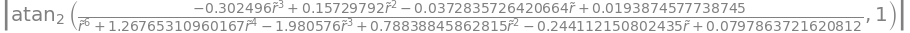

In [180]:
angle_3

In [185]:
r_tilde_vals = np.arange(r_tilde_plus_val - 10, r_tilde_plus_val + 10, 0.01)

In [186]:
angle_1_vals = np.zeros(len(r_tilde_vals))
angle_2_vals = np.zeros(len(r_tilde_vals))
angle_3_vals = np.zeros(len(r_tilde_vals))

for i, r_tilde_val in enumerate(r_tilde_vals):
    angle_1_vals[i] = angle_1.subs({r_tilde: r_tilde_val}).evalf()
    angle_2_vals[i] = angle_2.subs({r_tilde: r_tilde_val}).evalf()
    angle_3_vals[i] = angle_3.subs({r_tilde: r_tilde_val}).evalf()

In [187]:
num_r_tilde_evals = 400
r_tilde_multiplers = np.linspace(0.001, 6, num_r_tilde_evals)

# at evaluation points
r_tilde_val_evals = np.zeros(len(r_tilde_multiplers))
angle_1_eval_vals = np.zeros(len(r_tilde_multiplers))
angle_2_eval_vals = np.zeros(len(r_tilde_multiplers))
angle_3_eval_vals = np.zeros(len(r_tilde_multiplers))

for i, r_tilde_mult in enumerate(r_tilde_multiplers):
    r_tilde_val_evals[i] = r_tilde_plus_val + r_tilde_mult * np.abs(r_tilde_plus_val)
    angle_1_eval_vals[i] = angle_1.subs({r_tilde: r_tilde_val_evals[i]}).evalf()
    angle_2_eval_vals[i] = angle_2.subs({r_tilde: r_tilde_val_evals[i]}).evalf()
    angle_3_eval_vals[i] = angle_3.subs({r_tilde: r_tilde_val_evals[i]}).evalf()

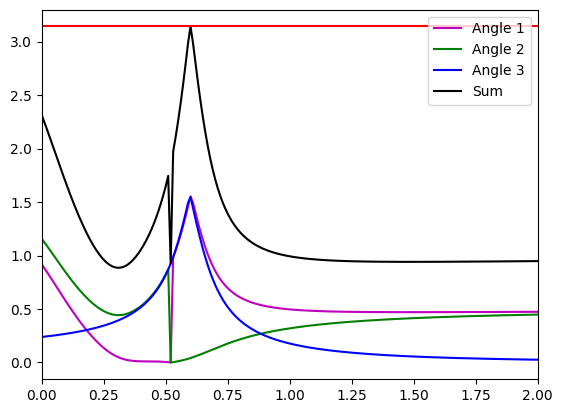

In [188]:
plt.plot(r_tilde_vals, angle_1_vals, 'm-', label='Angle 1')
plt.plot(r_tilde_vals, angle_2_vals, 'g-', label='Angle 2')
plt.plot(r_tilde_vals, angle_3_vals, 'b-', label='Angle 3')
plt.plot(r_tilde_vals, angle_1_vals + angle_2_vals + angle_3_vals, 'k-', label='Sum')
plt.plot([r_tilde_plus_val - 10, r_tilde_plus_val + 10], [np.pi, np.pi], 'r-')
plt.xlim([r_tilde_plus_val, r_tilde_plus_val + 10])
plt.xlim([0, 2])
plt.legend(loc='upper right');

In [343]:
def evaluate_cond(r_tilde_val, theta_val, r_tilde_plus_val, a_val):
    vals_dict = {}
    for var_name, var_val in [(A, A_val), (B, B_val), (C, C_val), (D, D_val), (E, E_val), (F, F_val), (G, G_val), (H, H_val)]:
        vals_dict[var_name] = var_val.subs({r_tilde: r_tilde_val, theta: theta_val, r_tilde_plus: r_tilde_plus_val, a: a_val})

    beta_val = beta.subs(vals_dict).evalf()

    if sympy.Abs(sympy.im(beta_val)) < 1e-8:
        beta_val = sympy.re(beta_val)
    else:
        print(f"Beta complex for r = {r_tilde_val}")
        return np.nan, np.nan, np.nan, np.nan

    if beta_val == sympy.nan:
        print(f"Beta NaN for r = {r_tilde_val}")
        return np.nan, np.nan, np.nan, np.nan

    if beta_val < 0:
        alpha_plus_real_val = sympy.sqrt(-beta_val) / (2 * (A * E - C ** 2))
        alpha_plus_real_val = alpha_plus_real_val.subs(vals_dict).evalf()
        alpha_plus_imag_val = (A * F + B * E - 2 * C * D) / (2 * (A * E - C ** 2))
        alpha_plus_imag_val = alpha_plus_imag_val.subs(vals_dict).evalf()

        alpha_minus_real_val = -sympy.sqrt(-beta_val) / (2 * (A * E - C ** 2))
        alpha_minus_real_val = alpha_minus_real_val.subs(vals_dict).evalf()
        alpha_minus_imag_val = (A * F + B * E - 2 * C * D) / (2 * (A * E - C ** 2))
        alpha_minus_imag_val = alpha_minus_imag_val.subs(vals_dict).evalf()
    else:
        alpha_plus_imag_val = (A * F + B * E - 2 * C * D + sympy.sqrt(beta_val)) / (2 * (A * E - C ** 2))
        alpha_plus_imag_val = alpha_plus_imag_val.subs(vals_dict).evalf()
        alpha_plus_real_val = 0

        alpha_minus_imag_val = (A * F + B * E - 2 * C * D - sympy.sqrt(beta_val)) / (2 * (A * E - C ** 2))
        alpha_minus_imag_val = alpha_minus_imag_val.subs(vals_dict).evalf()
        alpha_minus_real_val = 0

    if alpha_plus_imag_val in [sympy.nan, sympy.zoo] or alpha_plus_real_val in [sympy.nan, sympy.zoo]:
        print(f"Alpha plus NaN for r = {r_tilde_val}")
        return np.nan, np.nan, np.nan, np.nan

    if sympy.Abs(sympy.im(alpha_plus_imag_val)) < 1e-8 and sympy.Abs(sympy.im(alpha_plus_real_val)) < 1e-8:
        alpha_plus_imag_val = sympy.re(alpha_plus_imag_val)
        alpha_plus_real_val = sympy.re(alpha_plus_real_val)
    else:
        print(f"Alpha plus complex for r = {r_tilde_val}")
        return np.nan, np.nan, np.nan, np.nan

    if alpha_minus_imag_val in [sympy.nan, sympy.zoo] or alpha_minus_real_val in [sympy.nan, sympy.zoo]:
        print(f"Alpha minus NaN for r = {r_tilde_val}")
        return np.nan, np.nan, np.nan, np.nan

    if sympy.Abs(sympy.im(alpha_minus_imag_val)) < 1e-8 and sympy.Abs(sympy.im(alpha_minus_real_val)) < 1e-8:
        alpha_minus_imag_val = sympy.re(alpha_minus_imag_val)
        alpha_minus_real_val = sympy.re(alpha_minus_real_val)
    else:
        print(f"Alpha minus complex for r = {r_tilde_val}")
        return np.nan, np.nan, np.nan, np.nan

    lambda_r = (H / G).subs(vals_dict).evalf()
    if lambda_r == sympy.nan:
        print(f"Lambda r NaN for r = {r_tilde_val}")
        return np.nan, np.nan, np.nan, np.nan

    angle_1 = sympy.Abs(sympy.atan2(alpha_plus_imag_val, alpha_plus_real_val + 1)).evalf()
    angle_2 = sympy.Abs(sympy.atan2(alpha_minus_imag_val, alpha_minus_real_val + 1)).evalf()
    angle_3 = sympy.Abs(sympy.atan2(lambda_r, 1)).evalf()

    is_real_pos_def = (
        vals_dict[A] > 0 and vals_dict[E] > 0 and vals_dict[G] > 0 and (vals_dict[A] * vals_dict[E] > vals_dict[C] ** 2)
    )

    return float(angle_1), float(angle_2), float(angle_3), is_real_pos_def

In [349]:
a_vals = np.arange(0, 1, 0.01)
r_tilde_plus_vals = np.arange(-1, 1.01, 0.01)
a_vals_grid, r_tilde_plus_vals_grid = np.meshgrid(a_vals, r_tilde_plus_vals)

In [103]:
angle_1_maps = {}
angle_2_maps = {}
angle_3_maps = {}
is_real_pos_def_maps = {}

#### $\theta = \pi/2$

In [413]:
theta_val = np.pi / 2
r_tilde_val_template = 2 * r_tilde_plus

In [351]:
angle_1_map = np.zeros(a_vals_grid.shape, dtype=float)
angle_2_map = np.zeros(a_vals_grid.shape, dtype=float)
angle_3_map = np.zeros(a_vals_grid.shape, dtype=float)
is_real_pos_def_map = np.zeros(a_vals_grid.shape, dtype=bool)

with tqdm(total=np.prod(a_vals_grid.shape)) as pbar:
    for i in range(a_vals_grid.shape[0]):
        for j in range(a_vals_grid.shape[1]):
            r_tilde_val = r_tilde_val_template.subs({r_tilde_plus: r_tilde_plus_vals_grid[i, j]}).evalf()
            angle_1_map[i, j], angle_2_map[i, j], angle_3_map[i, j], is_real_pos_def_map[i, j] = evaluate_cond(
                r_tilde_val, theta_val, r_tilde_plus_vals_grid[i, j], a_vals_grid[i, j]
            )
            pbar.update(1)

angle_1_maps[theta_val, r_tilde_val_template] = angle_1_map
angle_2_maps[theta_val, r_tilde_val_template] = angle_2_map
angle_3_maps[theta_val, r_tilde_val_template] = angle_3_map
is_real_pos_def_maps[theta_val, r_tilde_val_template] = is_real_pos_def_map

100%|██████████| 20100/20100 [09:51<00:00, 33.96it/s]


In [352]:
sum_of_angles = (
    angle_1_maps[theta_val, r_tilde_val_template] +
    angle_2_maps[theta_val, r_tilde_val_template] +
    angle_3_maps[theta_val, r_tilde_val_template]
)

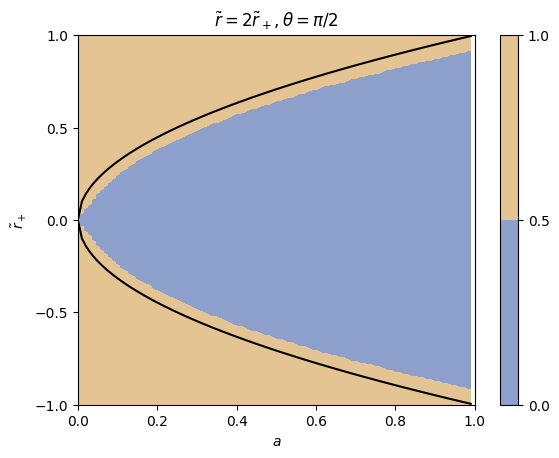

In [354]:
plt.contourf(a_vals_grid, r_tilde_plus_vals_grid, np.logical_and(is_real_pos_def_map, sum_of_angles < np.pi - 1e-8), cmap='Set2')
plt.plot(a_vals, [sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.plot(a_vals, [-sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.xlabel("$a$")
plt.ylabel("$\\tilde{r}_+$")
plt.xlim([0, 1])
plt.ylim([-1, 1])
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.colorbar()
plt.title('$\\tilde{r} = 2\\tilde{r}_+, \\theta = \pi/2$');

Do sweeps across $\tilde{r}$.

In [363]:
num_r_tilde_evals = 200
r_tilde_multiplers = np.linspace(0.001, 4, num_r_tilde_evals)

In [106]:
angle_1_maps = {}
angle_2_maps = {}
angle_3_maps = {}
is_real_pos_def_maps = {}

In [364]:
# coarse grid
a_vals = np.arange(0, 1.01, 0.01)
r_tilde_plus_vals = np.arange(-1, 1.025, 0.025)
a_vals_grid, r_tilde_plus_vals_grid = np.meshgrid(a_vals, r_tilde_plus_vals)

In [365]:
angle_1_map = np.zeros((num_r_tilde_evals,) + a_vals_grid.shape, dtype=float)
angle_2_map = np.zeros((num_r_tilde_evals,) + a_vals_grid.shape, dtype=float)
angle_3_map = np.zeros((num_r_tilde_evals,) + a_vals_grid.shape, dtype=float)
is_real_pos_def_map = np.zeros((num_r_tilde_evals,) + a_vals_grid.shape, dtype=bool)

with tqdm(total=np.prod(a_vals_grid.shape)) as pbar:
    for i in range(a_vals_grid.shape[0]):
        for j in range(a_vals_grid.shape[1]):
            # get angles as a function of r_tilde for given parameter values
            angle_1, angle_2, angle_3, vals_dict = cond_sym(theta_val, r_tilde_plus_vals_grid[i, j], a_vals_grid[i, j])

            for k, r_tilde_mult in enumerate(r_tilde_multiplers):
                r_tilde_val = r_tilde_plus_vals_grid[i, j] + r_tilde_mult * np.abs(r_tilde_plus_vals_grid[i, j])

                angle_1_map[k, i, j] = angle_1.subs({r_tilde: r_tilde_val}).evalf()
                angle_2_map[k, i, j] = angle_2.subs({r_tilde: r_tilde_val}).evalf()
                angle_3_map[k, i, j] = angle_3.subs({r_tilde: r_tilde_val}).evalf()

                # check if real part is positive definite
                A_val_k = vals_dict[A].subs({r_tilde: r_tilde_val}).evalf()
                E_val_k = vals_dict[E].subs({r_tilde: r_tilde_val}).evalf()
                is_real_pos_def_map[k, i, j] = (
                    A_val_k > 0 and E_val_k > 0 and vals_dict[G].subs({r_tilde: r_tilde_val}).evalf() > 0 and
                    (A_val_k * E_val_k > vals_dict[C].subs({r_tilde: r_tilde_val}).evalf() ** 2)
                )

            pbar.update(1)

angle_1_maps[theta_val] = angle_1_map
angle_2_maps[theta_val] = angle_2_map
angle_3_maps[theta_val] = angle_3_map
is_real_pos_def_maps[theta_val] = is_real_pos_def_map

100%|██████████| 8181/8181 [6:21:04<00:00,  2.79s/it]  


In [414]:
cond_all_r_tilde = np.all(angle_1_maps[theta_val] + angle_2_maps[theta_val] + angle_3_maps[theta_val] < np.pi - 1e-10, axis=0)

Plot regions without positive definite requirement.

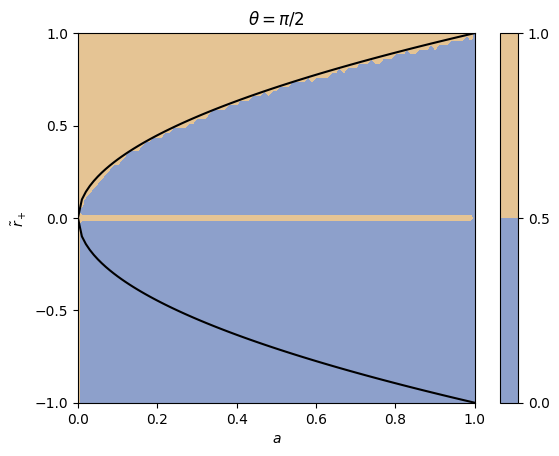

In [415]:
plt.contourf(a_vals_grid, r_tilde_plus_vals_grid, cond_all_r_tilde, cmap='Set2')
plt.plot(a_vals, [sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.plot(a_vals, [-sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.xlabel("$a$")
plt.ylabel("$\\tilde{r}_+$")
plt.xlim([0, 1])
plt.ylim([-1, 1])
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.colorbar()
plt.title('$\\theta = \pi/2$');

Plot with positive definite requirement.

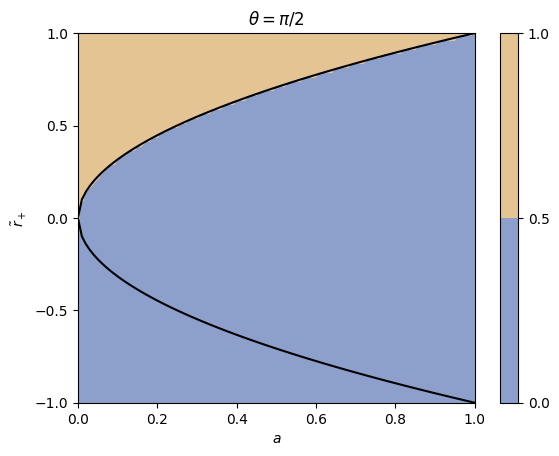

In [417]:
plt.contourf(a_vals_grid, r_tilde_plus_vals_grid, np.logical_and(np.all(is_real_pos_def_maps[theta_val], axis=0), cond_all_r_tilde), cmap='Set2')
plt.plot(a_vals, [sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.plot(a_vals, [-sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.xlabel("$a$")
plt.ylabel("$\\tilde{r}_+$")
plt.xlim([0, 1])
plt.ylim([-1, 1])
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.colorbar()
plt.title('$\\theta = \pi/2$')
plt.savefig('../../figures/complex_eigenvalues_cond_pi_2.pdf', bbox_inches='tight', dpi=300);

Check sign of $\beta$.

In [ ]:
beta_val_2 = beta_val.expand().collect(r_tilde)

In [ ]:
# this code takes a long time to run, since beta is a high order polynomial and finding the roots is expensive
def is_beta_negative(theta_val, r_tilde_plus_val, a_val, offset=1):
    """Check whether beta is negative for any r_tilde > r_tilde_plus.

    Args:
        theta_val: Value of theta
        r_tilde_plus_val: Value of parameter r_tilde_plus
        a_val: Value of parameter a
        offset: Offset to use when exploring the sign of beta for r_tilde > r_tilde_plus

    Returns:
        Whether beta can negative

    """
    beta_val_subs = beta_val_2.subs({theta: theta_val, r_tilde_plus: r_tilde_plus_val, a: a_val})

    # numerically solve for roots
    roots = sympy.solve(beta_val_subs, r_tilde)

    if not roots:
        print(f"No roots found for a = {a_val}, r_tilde_plus = {r_tilde_plus_val}")

    for r in roots:
        if r != sympy.nan:
            if np.abs(r.coeff(sympy.I)) < 1e-10:
                if r.is_real:
                    real_part = r
                else:
                    real_part = r.args[0]
                if real_part > r_tilde_plus_val:
                    # root is larger than r_tilde_plus, so beta must be negative for some r_tilde > r_tilde_plus
                    return True

    # r_tilde_plus greater than or equal to all real roots, so check sign of beta for any r_tilde > r_tilde_plus
    # to determine if beta is positive or negative
    beta_val_gt_r_tilde_plus = beta_val_subs.subs({r_tilde: r_tilde_plus_val + offset}).evalf()

    return beta_val_gt_r_tilde_plus < 0

In [238]:
beta_vals_maps = {}

In [239]:
beta_vals_map = np.zeros((num_r_tilde_evals,) + a_vals_grid.shape, dtype=float)

with tqdm(total=np.prod(a_vals_grid.shape)) as pbar:
    for i in range(a_vals_grid.shape[0]):
        for j in range(a_vals_grid.shape[1]):
            beta_val_subs = beta_val_2.subs({theta: theta_val, r_tilde_plus: r_tilde_plus_vals_grid[i, j], a: a_vals_grid[i, j]})
            for k, r_tilde_mult in enumerate(r_tilde_multiplers):
                r_tilde_val = r_tilde_plus_vals_grid[i, j] + r_tilde_mult * np.abs(r_tilde_plus_vals_grid[i, j])
                beta_vals_map[k, i, j] = beta_val_subs.subs({r_tilde: r_tilde_val}).evalf()
            pbar.update(1)

beta_vals_maps[theta_val] = beta_vals_map

100%|██████████| 8181/8181 [12:11:36<00:00,  5.37s/it]  


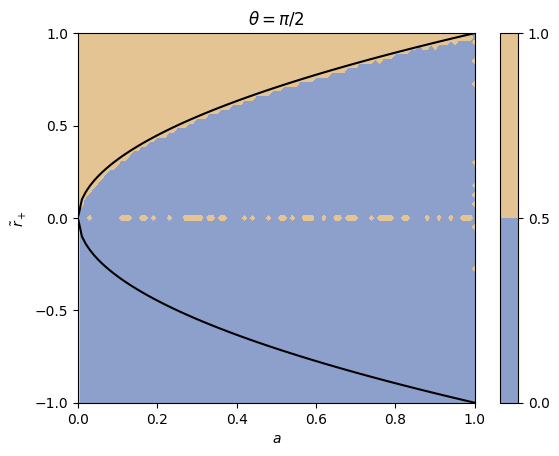

In [247]:
plt.contourf(a_vals_grid, r_tilde_plus_vals_grid, np.all(beta_vals_maps[theta_val] > 0, axis=0), cmap='Set2')
plt.plot(a_vals, [sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.plot(a_vals, [-sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.xlabel("$a$")
plt.ylabel("$\\tilde{r}_+$")
plt.xlim([0, 1])
plt.ylim([-1, 1])
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.colorbar()
plt.title('$\\theta = \pi/2$');

In [110]:
# from complex_spacetime_metrics import complex_eigenvalues
# from multiprocessing import Pool

# import importlib
# importlib.reload(complex_eigenvalues);

# a_vals = np.arange(0, 1, 0.1)
# r_tilde_plus_vals = np.arange(-1, 1.1, 0.1)
# a_vals_grid, r_tilde_plus_vals_grid = np.meshgrid(a_vals, r_tilde_plus_vals)

# args_parallel = [
#     (theta_val, rp, av, A_val, B_val, C_val, D_val, E_val, F_val, G_val, H_val)
#     for av, rp in zip(a_vals_grid.flatten(), r_tilde_plus_vals_grid.flatten())
# ]

# processes_count = 5

# with Pool(processes_count) as pool:
#     results = pool.starmap(complex_eigenvalues.is_allowable, tqdm(args_parallel, total=len(args_parallel)))

In [111]:
# plt.contourf(a_vals_grid, r_tilde_plus_vals_grid, np.array(results).reshape(a_vals_grid.shape), cmap='Set2')
# plt.plot(a_vals, [sympy.sqrt(a_val) for a_val in a_vals], 'k-')
# plt.plot(a_vals, [-sympy.sqrt(a_val) for a_val in a_vals], 'k-')
# plt.xlabel("$a$")
# plt.ylabel("$\\tilde{r}_+$")
# plt.xlim([0, 1])
# plt.ylim([-1, 1])
# plt.yticks([-1, -0.5, 0, 0.5, 1])
# plt.colorbar()
# plt.title('$\\theta = \pi/2$');

Plot angles.

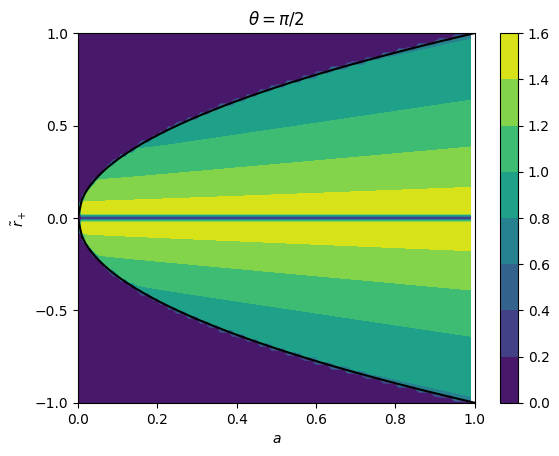

In [387]:
plt.contourf(a_vals_grid, r_tilde_plus_vals_grid, angle_1_maps[theta_val][0])
plt.plot(a_vals, [sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.plot(a_vals, [-sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.xlabel("$a$")
plt.ylabel("$\\tilde{r}_+$")
plt.xlim([0, 1])
plt.ylim([-1, 1])
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.colorbar()
plt.title('$\\theta = \pi/2$');

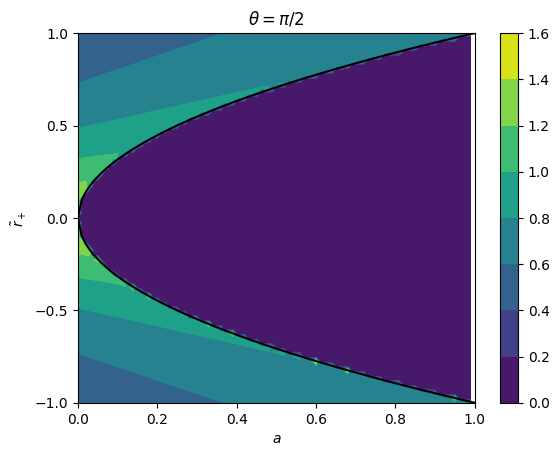

In [390]:
plt.contourf(a_vals_grid, r_tilde_plus_vals_grid, angle_2_maps[theta_val][0])
plt.plot(a_vals, [sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.plot(a_vals, [-sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.xlabel("$a$")
plt.ylabel("$\\tilde{r}_+$")
plt.xlim([0, 1])
plt.ylim([-1, 1])
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.colorbar()
plt.title('$\\theta = \pi/2$');

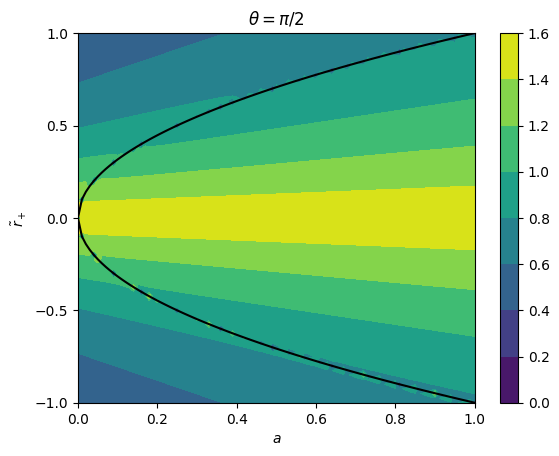

In [391]:
plt.contourf(a_vals_grid, r_tilde_plus_vals_grid, angle_3_maps[theta_val][0])
plt.plot(a_vals, [sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.plot(a_vals, [-sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.xlabel("$a$")
plt.ylabel("$\\tilde{r}_+$")
plt.xlim([0, 1])
plt.ylim([-1, 1])
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.colorbar()
plt.title('$\\theta = \pi/2$');

#### $\theta = \pi/4$

In [399]:
theta_val = np.pi / 4

In [400]:
angle_1_map = np.zeros((num_r_tilde_evals,) + a_vals_grid.shape, dtype=float)
angle_2_map = np.zeros((num_r_tilde_evals,) + a_vals_grid.shape, dtype=float)
angle_3_map = np.zeros((num_r_tilde_evals,) + a_vals_grid.shape, dtype=float)
is_real_pos_def_map = np.zeros((num_r_tilde_evals,) + a_vals_grid.shape, dtype=bool)

with tqdm(total=np.prod(a_vals_grid.shape)) as pbar:
    for i in range(a_vals_grid.shape[0]):
        for j in range(a_vals_grid.shape[1]):
            # get angles as a function of r_tilde for given parameter values
            angle_1, angle_2, angle_3, vals_dict = cond_sym(theta_val, r_tilde_plus_vals_grid[i, j], a_vals_grid[i, j])

            for k, r_tilde_mult in enumerate(r_tilde_multiplers):
                r_tilde_val = r_tilde_plus_vals_grid[i, j] + r_tilde_mult * np.abs(r_tilde_plus_vals_grid[i, j])

                angle_1_map[k, i, j] = angle_1.subs({r_tilde: r_tilde_val}).evalf()
                angle_2_map[k, i, j] = angle_2.subs({r_tilde: r_tilde_val}).evalf()
                angle_3_map[k, i, j] = angle_3.subs({r_tilde: r_tilde_val}).evalf()

                # check if real part is positive definite
                A_val_k = vals_dict[A].subs({r_tilde: r_tilde_val}).evalf()
                E_val_k = vals_dict[E].subs({r_tilde: r_tilde_val}).evalf()
                is_real_pos_def_map[k, i, j] = (
                    A_val_k > 0 and E_val_k > 0 and vals_dict[G].subs({r_tilde: r_tilde_val}).evalf() > 0 and
                    (A_val_k * E_val_k > vals_dict[C].subs({r_tilde: r_tilde_val}).evalf() ** 2)
                )

            pbar.update(1)

angle_1_maps[theta_val] = angle_1_map
angle_2_maps[theta_val] = angle_2_map
angle_3_maps[theta_val] = angle_3_map
is_real_pos_def_maps[theta_val] = is_real_pos_def_map

100%|██████████| 8181/8181 [6:27:05<00:00,  2.84s/it]  


In [407]:
cond_all_r_tilde = np.all(angle_1_maps[theta_val] + angle_2_maps[theta_val] + angle_3_maps[theta_val] < np.pi - 1e-10, axis=0)

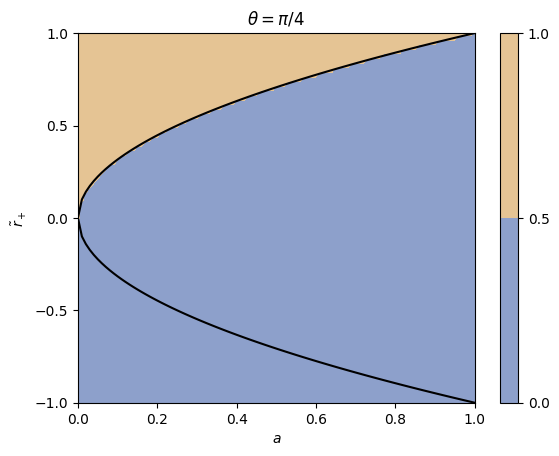

In [408]:
plt.contourf(a_vals_grid, r_tilde_plus_vals_grid, np.logical_and(np.all(is_real_pos_def_maps[theta_val], axis=0), cond_all_r_tilde), cmap='Set2')
plt.plot(a_vals, [sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.plot(a_vals, [-sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.xlabel("$a$")
plt.ylabel("$\\tilde{r}_+$")
plt.xlim([0, 1])
plt.ylim([-1, 1])
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.colorbar()
plt.title('$\\theta = \pi/4$')
plt.savefig('../../figures/complex_eigenvalues_cond_pi_4.pdf', bbox_inches='tight', dpi=300);

#### $\theta = \pi/8$

In [409]:
theta_val = np.pi / 8

In [395]:
angle_1_map = np.zeros((num_r_tilde_evals,) + a_vals_grid.shape, dtype=float)
angle_2_map = np.zeros((num_r_tilde_evals,) + a_vals_grid.shape, dtype=float)
angle_3_map = np.zeros((num_r_tilde_evals,) + a_vals_grid.shape, dtype=float)
is_real_pos_def_map = np.zeros((num_r_tilde_evals,) + a_vals_grid.shape, dtype=bool)

with tqdm(total=np.prod(a_vals_grid.shape)) as pbar:
    for i in range(a_vals_grid.shape[0]):
        for j in range(a_vals_grid.shape[1]):
            # get angles as a function of r_tilde for given parameter values
            angle_1, angle_2, angle_3, vals_dict = cond_sym(theta_val, r_tilde_plus_vals_grid[i, j], a_vals_grid[i, j])

            for k, r_tilde_mult in enumerate(r_tilde_multiplers):
                r_tilde_val = r_tilde_plus_vals_grid[i, j] + r_tilde_mult * np.abs(r_tilde_plus_vals_grid[i, j])

                angle_1_map[k, i, j] = angle_1.subs({r_tilde: r_tilde_val}).evalf()
                angle_2_map[k, i, j] = angle_2.subs({r_tilde: r_tilde_val}).evalf()
                angle_3_map[k, i, j] = angle_3.subs({r_tilde: r_tilde_val}).evalf()

                # check if real part is positive definite
                A_val_k = vals_dict[A].subs({r_tilde: r_tilde_val}).evalf()
                E_val_k = vals_dict[E].subs({r_tilde: r_tilde_val}).evalf()
                is_real_pos_def_map[k, i, j] = (
                    A_val_k > 0 and E_val_k > 0 and vals_dict[G].subs({r_tilde: r_tilde_val}).evalf() > 0 and
                    (A_val_k * E_val_k > vals_dict[C].subs({r_tilde: r_tilde_val}).evalf() ** 2)
                )

            pbar.update(1)

angle_1_maps[theta_val] = angle_1_map
angle_2_maps[theta_val] = angle_2_map
angle_3_maps[theta_val] = angle_3_map
is_real_pos_def_maps[theta_val] = is_real_pos_def_map

100%|██████████| 8181/8181 [6:13:41<00:00,  2.74s/it]  


In [410]:
cond_all_r_tilde = np.all(angle_1_maps[theta_val] + angle_2_maps[theta_val] + angle_3_maps[theta_val] < np.pi - 1e-10, axis=0)

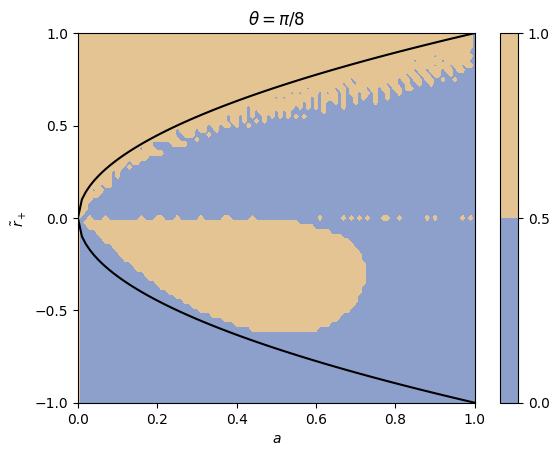

In [411]:
plt.contourf(a_vals_grid, r_tilde_plus_vals_grid, cond_all_r_tilde, cmap='Set2')
plt.plot(a_vals, [sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.plot(a_vals, [-sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.xlabel("$a$")
plt.ylabel("$\\tilde{r}_+$")
plt.xlim([0, 1])
plt.ylim([-1, 1])
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.colorbar()
plt.title('$\\theta = \pi/8$');

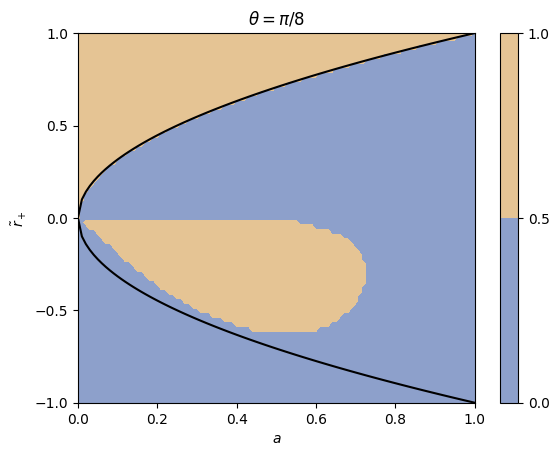

In [412]:
plt.contourf(a_vals_grid, r_tilde_plus_vals_grid, np.logical_and(np.all(is_real_pos_def_maps[theta_val], axis=0), cond_all_r_tilde), cmap='Set2')
plt.plot(a_vals, [sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.plot(a_vals, [-sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.xlabel("$a$")
plt.ylabel("$\\tilde{r}_+$")
plt.xlim([0, 1])
plt.ylim([-1, 1])
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.colorbar()
plt.title('$\\theta = \pi/8$')
plt.savefig('../../figures/complex_eigenvalues_cond_pi_8.pdf', bbox_inches='tight', dpi=300);

#### $\theta = \pi/16$

In [419]:
theta_val = np.pi / 16

In [420]:
angle_1_map = np.zeros((num_r_tilde_evals,) + a_vals_grid.shape, dtype=float)
angle_2_map = np.zeros((num_r_tilde_evals,) + a_vals_grid.shape, dtype=float)
angle_3_map = np.zeros((num_r_tilde_evals,) + a_vals_grid.shape, dtype=float)
is_real_pos_def_map = np.zeros((num_r_tilde_evals,) + a_vals_grid.shape, dtype=bool)

with tqdm(total=np.prod(a_vals_grid.shape)) as pbar:
    for i in range(a_vals_grid.shape[0]):
        for j in range(a_vals_grid.shape[1]):
            # get angles as a function of r_tilde for given parameter values
            angle_1, angle_2, angle_3, vals_dict = cond_sym(theta_val, r_tilde_plus_vals_grid[i, j], a_vals_grid[i, j])

            for k, r_tilde_mult in enumerate(r_tilde_multiplers):
                r_tilde_val = r_tilde_plus_vals_grid[i, j] + r_tilde_mult * np.abs(r_tilde_plus_vals_grid[i, j])

                angle_1_map[k, i, j] = angle_1.subs({r_tilde: r_tilde_val}).evalf()
                angle_2_map[k, i, j] = angle_2.subs({r_tilde: r_tilde_val}).evalf()
                angle_3_map[k, i, j] = angle_3.subs({r_tilde: r_tilde_val}).evalf()

                # check if real part is positive definite
                A_val_k = vals_dict[A].subs({r_tilde: r_tilde_val}).evalf()
                E_val_k = vals_dict[E].subs({r_tilde: r_tilde_val}).evalf()
                is_real_pos_def_map[k, i, j] = (
                    A_val_k > 0 and E_val_k > 0 and vals_dict[G].subs({r_tilde: r_tilde_val}).evalf() > 0 and
                    (A_val_k * E_val_k > vals_dict[C].subs({r_tilde: r_tilde_val}).evalf() ** 2)
                )

            pbar.update(1)

angle_1_maps[theta_val] = angle_1_map
angle_2_maps[theta_val] = angle_2_map
angle_3_maps[theta_val] = angle_3_map
is_real_pos_def_maps[theta_val] = is_real_pos_def_map

100%|██████████| 8181/8181 [6:18:21<00:00,  2.77s/it]  


In [421]:
cond_all_r_tilde = np.all(angle_1_maps[theta_val] + angle_2_maps[theta_val] + angle_3_maps[theta_val] < np.pi - 1e-10, axis=0)

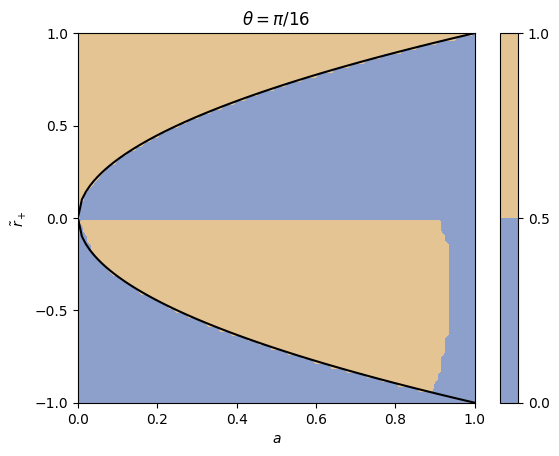

In [424]:
plt.contourf(a_vals_grid, r_tilde_plus_vals_grid, np.logical_and(np.all(is_real_pos_def_maps[theta_val], axis=0), cond_all_r_tilde), cmap='Set2')
plt.plot(a_vals, [sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.plot(a_vals, [-sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.xlabel("$a$")
plt.ylabel("$\\tilde{r}_+$")
plt.xlim([0, 1])
plt.ylim([-1, 1])
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.colorbar()
plt.title('$\\theta = \pi/16$')
plt.savefig('../../figures/complex_eigenvalues_cond_pi_16.pdf', bbox_inches='tight', dpi=300);